# Iris Classification
Iris classification is a typical machine learning project where we use a dataset to train a model to identiy the target. There are three species of iris flower. When the features flower is given we have to predict thai it belongs to which class.   

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [3]:
# Removing the id column
df = df.drop(columns= ['Id'])
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

### Information about Data

In [4]:
# Stastistical information of data
df.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# No of samples of each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Preprocessing  Dataset

In [7]:
# Checking the null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Data Analysis

<Axes: >

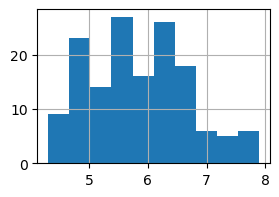

In [8]:
plt.figure(figsize = (3,2))
df['SepalLengthCm'].hist()

<Axes: >

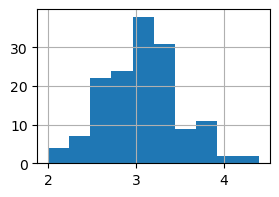

In [9]:
plt.figure(figsize = (3,2))
df['SepalWidthCm'].hist()

<Axes: >

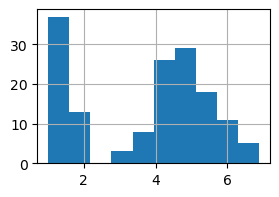

In [10]:
plt.figure(figsize = (3,2))
df['PetalLengthCm'].hist()

<Axes: >

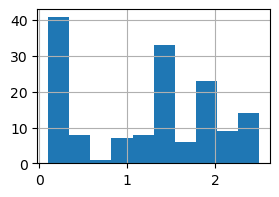

In [11]:
plt.figure(figsize = (3,2))
df['PetalWidthCm'].hist()

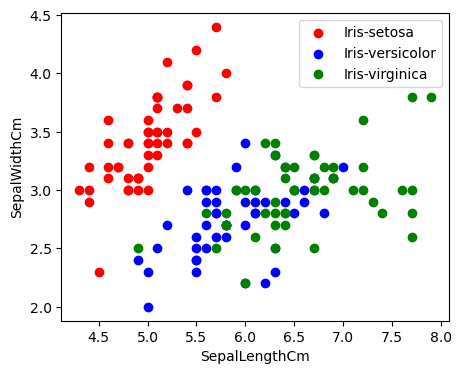

In [12]:
# Graph for different Species

plt.figure(figsize = (5,4))
Species = ["Iris-setosa" , "Iris-versicolor", "Iris-virginica"]
colors = ["red", "blue", "green"]

for i in range(3):
    x = df[df['Species'] == Species[i]]
    plt.scatter(x['SepalLengthCm'] , x['SepalWidthCm'] , c=colors[i], label=Species[i])
    
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()

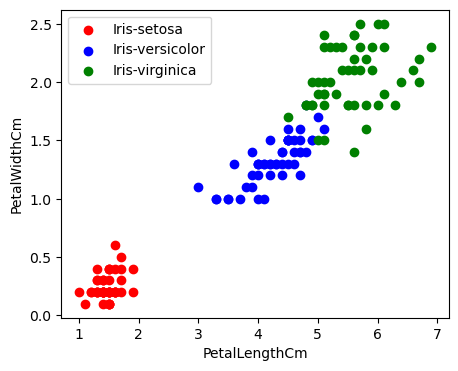

In [13]:
plt.figure(figsize = (5,4))
Species = ["Iris-setosa" , "Iris-versicolor", "Iris-virginica"]
colors = ["red", "blue", "green"]

for i in range(3):
    x = df[df['Species'] == Species[i]]
    plt.scatter(x['PetalLengthCm'] , x['PetalWidthCm'] , c=colors[i], label=Species[i])
    
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()

### Correlation Matrix

In [14]:
df.corr()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000

<Axes: >

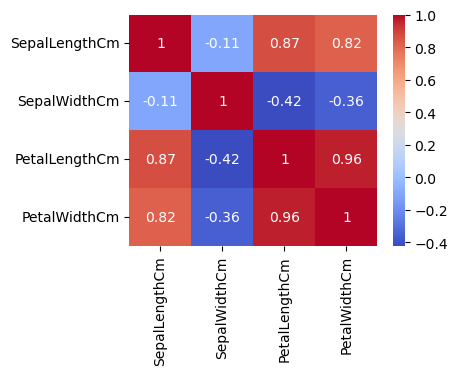

In [15]:
corr = df.corr()

fig,ax = plt.subplots(figsize=(4,3))
sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm")

### Label Encoder

In [16]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['Species'] = le.fit_transform(df['Species'])
# df.head()

### Model Training and Testing 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

In [18]:
X = df.drop(columns=['Species'])
Y = df["Species"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=41)

In [19]:
# Logistic Regression

model = LogisticRegression()
model.fit(x_train,y_train)
print("Accuracy of Logistic Regression :", model.score(x_test, y_test)*100)

Accuracy of Logistic Regression : 91.11111111111111


In [20]:
model.fit(x_train.values, y_train.values)

LogisticRegression()

In [21]:
print("Accuracy :", model.score(x_test, y_test)*100)

Accuracy : 91.11111111111111


In [30]:
# KNeighborClassifier

model = KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print("Accuracy of KNeighborClassifier :", model.score(x_test, y_test)*100)

Accuracy of KNeighborClassifier : 93.33333333333333


In [31]:
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [32]:
print("Accuracy :", model.score(x_test, y_test)*100)

Accuracy : 93.33333333333333


In [25]:
# Decision Tree Classifier

model  = DecisionTreeClassifier()
model.fit(x_train.values, y_train.values)
print("Accuracy of Decision Tree Classifier :", model.score(x_test, y_test)*100)

Accuracy of Decision Tree Classifier : 91.11111111111111


In [26]:
model.fit(x_train.values, y_train.values)

DecisionTreeClassifier()

In [27]:
print("Accuracy :", model.score(x_test, y_test)*100)

Accuracy : 91.11111111111111


### Save the Model

In [33]:
import pickle
filename = "saved_model.sav"
pickle.dump(model, open(filename, 'wb'))

In [34]:
filename = "saved_model.sav"
try:
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("Model Saved Successfully...")
except Exception as e:
    print(f"Error : {e}")

Model Saved Successfully...


In [35]:
load_model  = pickle.load(open(filename, 'rb'))

In [36]:
load_model.predict([[4.7,3.2,1.3,0.2]])

array(['Iris-setosa'], dtype=object)